In [34]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
pd.set_option('display.max_columns', None)

data = pd.read_excel('nba_player_data.xlsx')

In [53]:
data.sample(10)

,Year,Season_type,PLAYER_ID,RANK,PLAYER,TEAM_ID,TEAM,GP,MIN,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,FTM,FTA,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PTS,EFF,AST_TOV,STL_TOV
6709,2023-24,Regular%20Season,1627759,22,Jaylen Brown,1610612738,BOS,70,2343,627,1256,0.499,145,410,0.354,211,300,0.703,84,303,387,249,83,37,166,185,1610,1482,1.50,0.50
5831,2021-22,Playoffs,1629651,116,Nic Claxton,1610612751,BKN,4,98,19,24,0.792,0,0,0.000,4,22,0.182,7,18,25,6,5,9,2,6,42,62,3.00,2.50
823,2015-16,Regular%20Season,202685,124,Jonas Valančiūnas,1610612761,TOR,60,1557,303,536,0.565,0,0,0.000,162,213,0.761,184,363,547,42,25,80,85,158,768,1093,0.49,0.29
4288,2019-20,Playoffs,203118,174,Mike Scott,1610612755,PHI,4,20,1,5,0.200,0,2,0.000,4,4,1.000,2,6,8,1,0,0,0,2,6,11,0.00,0.00
5156,2021-22,Regular%20Season,202699,48,Tobias Harris,1610612755,PHI,73,2543,493,1022,0.482,101,275,0.367,170,202,0.842,77,419,496,252,47,43,116,164,1257,1418,2.17,0.41
4071,2019-20,Regular%20Season,1629648,486,Jordan Bone,1610612765,DET,10,53,5,20,0.250,2,10,0.200,0,0,0.000,0,4,4,8,1,0,2,6,12,8,4.00,0.50
4213,2019-20,Playoffs,203085,101,Austin Rivers,1610612745,HOU,12,211,19,61,0.311,9,35,0.257,10,13,0.769,2,28,30,16,7,1,8,22,57,58,2.00,0.88
2133,2017-18,Regular%20Season,201569,42,Eric Gordon,1610612745,HOU,69,2154,415,970,0.428,218,608,0.359,195,241,0.809,25,145,170,154,44,27,130,116,1243,907,1.19,0.34
4310,2019-20,Playoffs,201960,196,DeMarre Carroll,1610612745,HOU,2,6,1,2,0.500,0,0,0.000,0,0,0.000,0,3,3,1,0,0,0,1,2,5,0.00,0.00
5366,2021-22,Regular%20Season,202397,258,Ish Smith,1610612764,WAS,65,1126,185,430,0.430,25,67,0.373,15,24,0.625,25,115,140,244,47,23,78,78,410,532,3.13,0.60


In [54]:
data.shape

(7473, 30)

## Data Cleaning & Analysis Preparation

In [55]:
data.drop(columns=['RANK','EFF'], inplace=True)

In [56]:
data['season_start_year'] = data['Year'].str[:4].astype(int)

In [136]:
data['Season_type'].replace('Regular%20Season', 'RS', inplace=True)

In [139]:
rs_df = data[data['Season_type']=='RS']
playoffs_df = data[data['Season_type']=='Playoffs']

In [59]:
data.columns

Index(['Year', 'Season_type', 'PLAYER_ID', 'PLAYER', 'TEAM_ID', 'TEAM', 'GP',
       'MIN', 'FGM', 'FGA', 'FG_PCT', 'FG3M', 'FG3A', 'FG3_PCT', 'FTM', 'FTA',
       'FT_PCT', 'OREB', 'DREB', 'REB', 'AST', 'STL', 'BLK', 'TOV', 'PF',
       'PTS', 'AST_TOV', 'STL_TOV', 'season_start_year'],
      dtype='object')

In [60]:
total_cols = ['MIN', 'FGM', 'FGA', 'FG3M', 'FG3A', 'FTM', 'FTA',
              'OREB', 'DREB', 'REB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS']

## Which player stats are correlated with each other?

/var/folders/9v/vsbp1y656lgffz9zwbrwqwdr0000gn/T/ipykernel_23243/4261534714.py:18: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



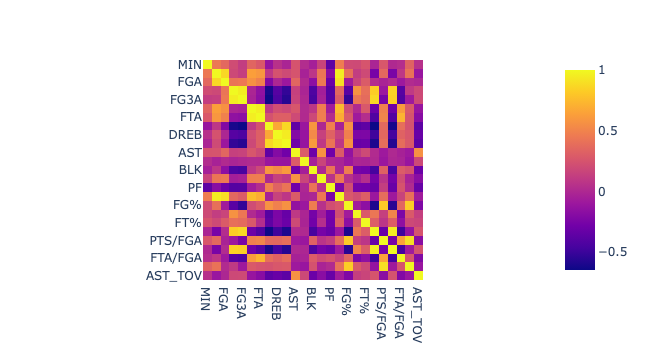

In [61]:
data_per_min = data.groupby(['PLAYER', 'PLAYER_ID', 'Year'])[total_cols].sum().reset_index()
for col in data_per_min.columns[4:]:
    data_per_min[col] = data_per_min[col]/data_per_min['MIN']

data_per_min['FG%'] = data_per_min['FGM']/data_per_min['FGA']
data_per_min['3PT%'] = data_per_min['FG3M']/data_per_min['FG3A']
data_per_min['FT%'] = data_per_min['FTM']/data_per_min['FTA']
data_per_min['FG3A%'] = data_per_min['FG3A']/data_per_min['FGA']
data_per_min['PTS/FGA'] = data_per_min['PTS']/data_per_min['FGA']
data_per_min['FG3m/FGM'] = data_per_min['FG3M']/data_per_min['FGM']
data_per_min['FTA/FGA'] = data_per_min['FTA']/data_per_min['FGA']
data_per_min['TRU%'] = 0.5*data_per_min['PTS']/(data_per_min['FGA']+0.475*data_per_min['FTA'])
data_per_min['AST_TOV'] = data_per_min['AST']/data_per_min['TOV']

data_per_min = data_per_min[data_per_min['MIN']>=50]
data_per_min.drop(columns='PLAYER_ID', inplace=True)

fig = px.imshow(data_per_min.corr())

fig.show()

## How are minutes played distributed?

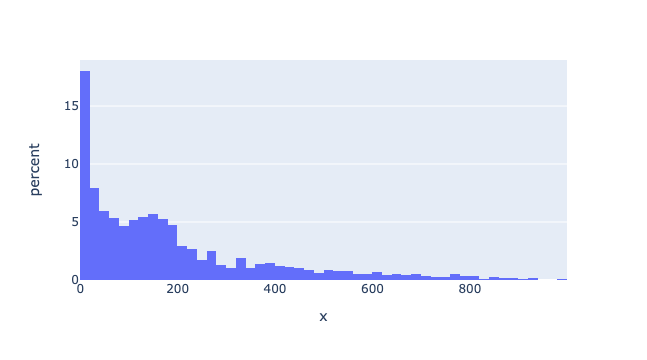

In [62]:
fig = px.histogram(x=playoffs_df['MIN'], histnorm='percent')
fig.show()

In [63]:
def hist_data(df=rs_df, min_MIN=0, min_GP=0):
    return df.loc[(df['MIN']>=min_MIN) & (df['GP']>=min_GP), 'PTS']/\
        df.loc[(df['MIN']>=min_MIN) & (df['GP']>=min_GP), 'GP']

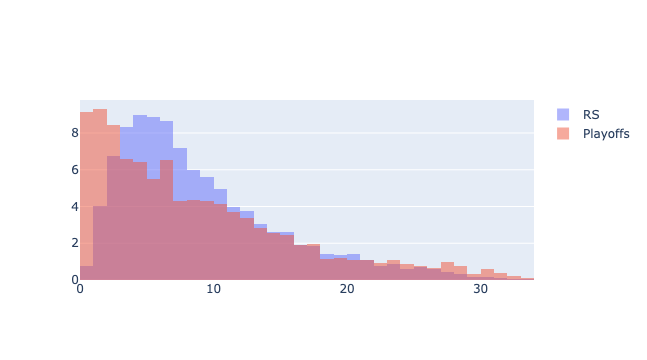

In [64]:
fig = go.Figure()
fig.add_trace(go.Histogram(x=hist_data(rs_df,50,5), histnorm='percent', name='RS', xbins={'start':0, 'end':34, 'size':1}))
fig.add_trace(go.Histogram(x=hist_data(playoffs_df,5,1), histnorm='percent', name='Playoffs', xbins={'start':0, 'end':34, 'size':1}))

fig.update_layout(barmode='overlay')
fig.update_traces(opacity=0.5)
fig.show()

In [65]:
((hist_data(rs_df,50,5)>=12) & (hist_data(rs_df,50,5)<=34)).mean()

0.25890637945318973

In [66]:
((hist_data(playoffs_df,5,1)>=12) & (hist_data(playoffs_df,5,1)<=34)).mean()

0.2719806763285024

## How has the game changed over the past 10 years?

In [89]:
change_df = data.groupby('season_start_year')[total_cols].sum().reset_index()
change_df['POSS_est'] = change_df['FGA']+change_df['OREB']+change_df['TOV']+0.44*change_df['FTA']
change_df = change_df[list(change_df.columns[0:2])+['POSS_est']+list(change_df.columns[2:-1])]

change_df['FG%'] = change_df['FGM']/change_df['FGA']
change_df['3PT%'] = change_df['FG3M']/change_df['FG3A']
change_df['FT%'] = change_df['FTM']/change_df['FTA']
change_df['AST%'] = change_df['AST']/change_df['FGM']
change_df['FG3A%'] = change_df['FG3A']/change_df['FGA']
change_df['PTS/FGA'] = change_df['PTS']/change_df['FGA']
change_df['FG3M/FGM'] = change_df['FG3M']/change_df['FGM']
change_df['FTA/FGA'] = change_df['FTA']/change_df['FGA']
change_df['TRU%'] = 0.5*change_df['PTS']/(change_df['FGA']+0.475*change_df['FTA'])
change_df['AST_TOV'] = change_df['AST']/change_df['TOV']

change_df

,season_start_year,MIN,POSS_est,FGM,FGA,FG3M,FG3A,FTM,FTA,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PTS,FG%,3PT%,FT%,AST%,FG3A%,PTS/FGA,FG3M/FGM,FTA/FGA,TRU%,AST_TOV
0,2014,634546,310136.12,98251,219265,20724,59276,45098,60248,28566,85231,113797,57727,20261,12665,35796,53272,262324,0.448092,0.349619,0.748539,0.587546,0.270340,1.196379,0.210929,0.274773,0.529129,1.612666
1,2015,636391,312916.80,100351,222344,22524,63673,46516,61520,27426,87611,115037,58251,20562,13046,36078,53478,269742,0.451332,0.353745,0.756112,0.580473,0.286372,1.213174,0.224452,0.276688,0.536126,1.614585
2,2016,632482,311383.80,102147,223333,25408,71018,46806,60620,26470,87173,113643,59162,20143,12409,34908,52232,276508,0.457375,0.357768,0.772121,0.579185,0.317992,1.238097,0.248740,0.271433,0.548350,1.694798
3,2017,633425,311698.52,103729,225523,27530,76245,43721,57008,25397,88678,114075,60739,20181,12636,35695,52238,278709,0.459949,0.361073,0.766927,0.585555,0.338081,1.235834,0.265403,0.252781,0.551677,1.701611
4,2018,634231,322995.84,107374,233717,29817,84143,46671,60811,27128,91360,118488,64257,19940,12984,35394,55063,291236,0.459419,0.354361,0.767476,0.598441,0.360021,1.246105,0.277693,0.260191,0.554519,1.815477
5,2019,552262,279988.64,92997,202223,28032,78279,40949,52906,22802,79318,102120,55445,17368,11085,31685,47615,254975,0.459874,0.358104,0.773995,0.596202,0.387092,1.260861,0.301429,0.261622,0.560746,1.749882
6,2020,562518,281595.48,95849,205754,29549,80653,39624,50917,22918,80151,103069,57311,17491,11272,30520,45152,260871,0.465843,0.366372,0.778208,0.597930,0.391988,1.267878,0.308287,0.247465,0.567260,1.877818
7,2021,635572,318108.96,106569,231293,32733,92552,44740,57709,27052,89602,116654,64618,20006,12387,34372,52038,290611,0.460753,0.353671,0.775269,0.606349,0.400150,1.256463,0.307153,0.249506,0.561665,1.879960
8,2022,635386,321406.04,110010,231870,32382,89926,48136,61516,27403,86695,114098,66265,19078,12250,35066,52438,300538,0.474447,0.360096,0.782496,0.602354,0.387829,1.296149,0.294355,0.265304,0.575545,1.889722
9,2023,633272,318736.48,110138,232542,33501,91831,44504,56767,27618,86355,113973,69408,19438,13434,33599,49201,298281,0.473626,0.364811,0.783977,0.630191,0.394901,1.282697,0.304173,0.244115,0.574709,2.065776


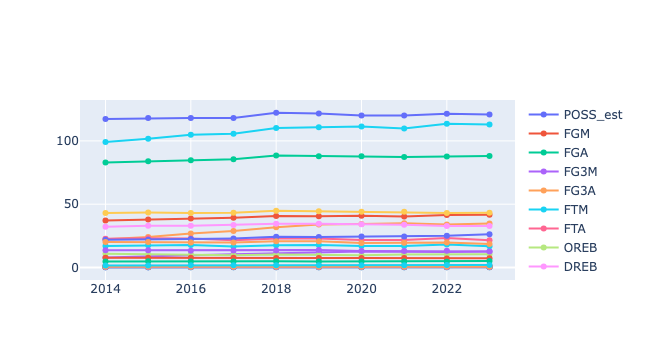

In [90]:
change_per48_df = change_df.copy()
for col in change_per48_df.columns[2:18]:
    change_per48_df[col] = (change_per48_df[col]/change_per48_df['MIN'])*48*5
    
change_per48_df.drop(columns='MIN', inplace=True)

fig = go.Figure()
for col in change_per48_df.columns[1:]:
    fig.add_trace(go.Scatter(x=change_per48_df['season_start_year'], y=change_per48_df[col], name=col))

fig.show()

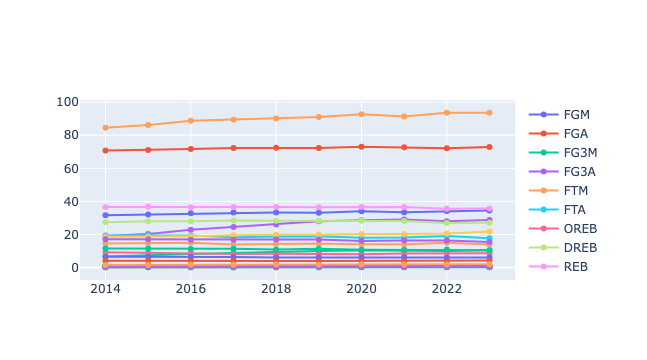

In [104]:
change_per100_df = change_df.copy()

for col in change_per100_df.columns[3:18]:
    change_per100_df[col] = (change_per100_df[col]/change_per100_df['POSS_est'])*100
    
change_per100_df.drop(columns=['MIN','POSS_est'], inplace=True)
change_per100_df
fig = go.Figure()
for col in change_per100_df.columns[1:]:
    fig.add_trace(go.Scatter(x=change_per100_df['season_start_year'], y=change_per100_df[col], name=col))

fig.show()

## Compare RS to Playoffs

In [112]:
rs_change_df = rs_df.groupby('season_start_year')[total_cols].sum().reset_index()
playoffs_change_df = playoffs_df.groupby('season_start_year')[total_cols].sum().reset_index()

for i in [rs_change_df, playoffs_change_df]:
    i['POSS_est'] = i['FGA']-i['OREB']+i['TOV']+0.44*i['FTA']
    i['POSS_per_48'] = (i['POSS_est']/i['MIN'])*48*5
    
    i['FG%'] = i['FGM']/i['FGA']
    i['3PT%'] = i['FG3M']/i['FG3A']
    i['FT%'] = i['FTM']/i['FTA']
    i['AST%'] = i['AST']/i['FGM']
    i['FG3A%'] = i['FG3A']/i['FGA']
    i['PTS/FGA'] = i['PTS']/i['FGA']
    i['FG3M/FGM'] = i['FG3M']/i['FGM']
    i['FTA/FGA'] = i['FTA']/i['FGA']
    i['TRU%'] = 0.5*i['PTS']/(i['FGA']+0.475*i['FTA'])
    i['AST_TOV'] = i['AST']/i['TOV']
    
    for col in total_cols:
        i[col] = 100*i[col]/i['POSS_est']
    i.drop(columns=['MIN', 'POSS_est'], inplace=True)

rs_change_df

,season_start_year,FGM,FGA,FG3M,FG3A,FTM,FTA,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PTS,POSS_per_48,FG%,3PT%,FT%,AST%,FG3A%,PTS/FGA,FG3M/FGM,FTA/FGA,TRU%,AST_TOV
0,2014,38.900086,86.650240,8.135183,23.240912,17.771371,23.688136,11.288515,33.604208,44.892723,22.846798,8.021797,4.972578,14.215495,20.960953,103.706727,95.659492,0.448932,0.350037,0.750222,0.587320,0.268215,1.196843,0.209130,0.273376,0.529645,1.607176
1,2015,38.926558,86.096120,8.670900,24.515476,17.996886,23.782176,10.603882,33.942436,44.546317,22.690502,7.988086,5.045782,14.043605,20.630890,104.520902,97.493488,0.452129,0.353691,0.756738,0.582905,0.284745,1.214002,0.222750,0.276228,0.536595,1.615718
2,2016,39.516445,86.434227,9.769173,27.323490,18.052073,23.388341,10.257879,33.777035,44.034914,22.896756,7.795428,4.800256,13.532781,20.136476,106.854135,98.151085,0.457185,0.357538,0.771841,0.579423,0.316119,1.236248,0.247218,0.270591,0.547724,1.691948
3,2017,39.782703,86.439951,10.536996,29.127708,16.700692,21.772593,9.754285,33.953813,43.708098,23.339648,7.750757,4.836313,13.734393,19.940143,106.803093,98.979263,0.460235,0.361752,0.767051,0.586678,0.336970,1.235576,0.264864,0.251881,0.551772,1.699358
4,2018,40.060963,86.993122,11.081358,31.213318,17.241016,22.498864,10.089962,33.952838,44.042800,23.975453,7.443993,4.830132,13.197341,20.384863,108.444300,101.847754,0.460507,0.355020,0.766306,0.598474,0.358802,1.246585,0.276612,0.258628,0.555099,1.816688
5,2019,39.741774,86.378550,11.875237,33.176460,17.368831,22.473502,9.798838,33.803237,43.602075,23.716035,7.438668,4.765339,13.531948,20.205627,108.727615,102.071250,0.460088,0.357942,0.772858,0.596753,0.384082,1.258734,0.298810,0.260175,0.560143,1.752596
6,2020,40.637565,87.183600,12.520406,34.156188,16.730698,21.517093,9.692393,33.988197,43.680589,24.457861,7.466502,4.804198,13.041271,19.021868,110.526234,100.810750,0.466115,0.366563,0.777554,0.601854,0.391773,1.267741,0.308099,0.246802,0.567359,1.875420
7,2021,40.444286,87.713064,12.383811,35.022979,16.859678,21.766578,10.288949,33.966643,44.255592,24.540976,7.597520,4.692395,12.998590,19.550702,110.132061,99.871250,0.461098,0.353591,0.774567,0.606785,0.399290,1.255595,0.306194,0.248157,0.561599,1.887972
8,2022,41.294479,86.867572,12.140801,33.658240,18.095028,23.147063,10.265233,32.468114,42.733347,24.905858,7.171547,4.578144,13.212954,19.655068,112.824787,100.886815,0.475373,0.360708,0.781742,0.603128,0.387466,1.298814,0.294005,0.266464,0.576446,1.884958
9,2023,41.832907,88.191909,12.734279,34.822783,16.897447,21.545728,10.469215,32.723859,43.193074,26.457331,7.414585,5.100728,12.797186,18.579409,113.297541,100.237318,0.474340,0.365688,0.784260,0.632453,0.394852,1.284670,0.304408,0.244305,0.575546,2.067433


In [117]:
comp_change_df = round(100*(playoffs_change_df-rs_change_df)/rs_change_df,3)
comp_change_df['season_start_year'] = list(range(2014,2024))
comp_change_df

,season_start_year,FGM,FGA,FG3M,FG3A,FTM,FTA,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PTS,POSS_per_48,FG%,3PT%,FT%,AST%,FG3A%,PTS/FGA,FG3M/FGM,FTA/FGA,TRU%,AST_TOV
0,2014,-2.737,0.266,11.046,12.980,4.844,8.464,0.314,3.983,3.060,-2.120,-2.726,10.739,-7.577,7.261,-0.357,0.549,-2.995,-1.712,-3.337,0.634,12.681,-0.621,14.171,8.176,-1.546,5.905
1,2015,-1.639,1.134,10.359,10.117,2.449,3.754,3.511,0.314,1.075,-8.193,-3.999,2.971,-7.096,6.995,0.060,-2.678,-2.741,0.220,-1.257,-6.663,8.883,-1.061,12.198,2.591,-1.358,-1.181
2,2016,0.316,-0.384,10.680,9.586,5.468,4.854,-2.594,-2.346,-2.404,-0.377,-0.318,0.412,-3.207,6.163,2.134,-1.399,0.703,0.998,0.586,-0.691,10.008,2.527,10.331,5.257,1.917,2.924
3,2017,-1.036,-0.020,2.286,5.358,5.549,5.813,-3.358,1.676,0.552,-4.159,-3.315,2.308,-6.315,6.690,0.322,-2.014,-1.016,-2.916,-0.250,-3.156,5.379,0.341,3.356,5.834,-0.280,2.301
4,2018,-4.331,-0.476,2.026,5.065,11.887,9.381,0.737,2.060,1.757,-4.422,-5.300,0.441,-3.336,8.363,-1.103,-2.406,-3.874,-2.893,2.291,-0.094,5.567,-0.630,6.645,9.904,-1.696,-1.123
5,2019,-2.298,-1.639,10.056,9.412,8.292,6.206,-10.140,1.575,-1.058,-3.600,-5.432,-10.645,-1.416,7.634,0.743,-2.870,-0.670,0.588,1.964,-1.333,11.235,2.422,12.644,7.975,1.531,-2.215
6,2020,0.620,1.445,1.480,2.218,6.434,5.243,4.155,0.363,1.204,-8.586,-8.981,-6.774,-10.378,9.637,1.598,-3.038,-0.813,-0.722,1.132,-9.150,0.762,0.151,0.855,3.744,-0.241,1.999
7,2021,-3.008,-1.845,1.867,1.512,8.047,6.628,-6.394,-1.246,-2.443,-4.127,-4.031,-0.146,2.504,12.789,-0.768,-2.734,-1.186,0.350,1.331,-1.153,3.419,1.097,5.026,8.632,0.185,-6.468
8,2022,-1.187,1.956,0.728,3.468,-3.520,-5.069,2.113,2.513,2.417,-3.253,-3.485,5.898,-7.308,1.156,-1.355,-2.888,-3.083,-2.649,1.632,-2.091,1.484,-3.247,1.938,-6.889,-2.493,4.375
9,2023,-1.416,1.139,-2.727,1.347,-0.795,-0.182,1.943,2.511,2.373,-7.483,-8.646,-0.814,-6.126,8.470,-1.471,-5.992,-2.526,-4.020,-0.614,-6.154,0.206,-2.581,-1.330,-1.307,-2.448,-1.445


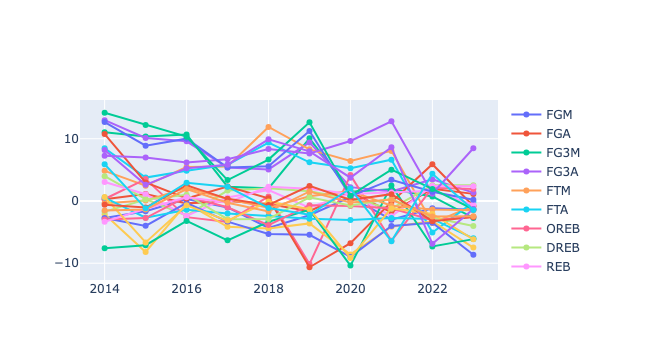

In [119]:
fig = go.Figure()
for col in comp_change_df.columns[1:]:
    fig.add_trace(go.Scatter(x=comp_change_df['season_start_year'], y=comp_change_df[col], name=col))

fig.show()